We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [31]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
import warnings

# Setup
warnings.filterwarnings("ignore")

Let’s display the first five rows of data

In [2]:
# Read data
file=pd.read_csv(r'C:\Users\Michel\git2\LabsDataAnalyticsIronhack\module_2\Lab_21_Time_Series_Models\airlines_passengers.csv')
file.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [3]:
file.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [4]:
file.Month=pd.to_datetime(file.Month)
file

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


The next thing we can do is convert the month column to an index. 


In [5]:
file.set_index('Month',inplace=True)

In [6]:
file

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

Text(0, 0.5, 'Number of Passengers')

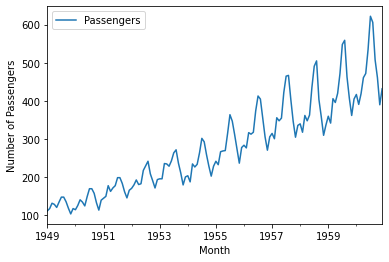

In [7]:
file.plot(y='Passengers')
plt.ylabel('Number of Passengers')

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [8]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
# Import adfuller
# Null Hypothesis, H0: The time series is not stationary.
# If p-value < 0.05 : We reject Ho : Time series is stationary
# If p-value > 0.05 : We accept Ho : Time series is not stationary
result = adfuller(file)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.8153688792060543
p-value: 0.9918802434376411
Critical Values:
   1%, -3.4816817173418295
Critical Values:
   5%, -2.8840418343195267
Critical Values:
   10%, -2.578770059171598


Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [9]:
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
# Import adfuller
# Null Hypothesis, H0: The time series is not stationary.
# If p-value < 0.05 : We reject Ho : Time series is stationary
# If p-value > 0.05 : We accept Ho : Time series is not stationary
results = adfuller(file, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.8153688792060543
p-value: 0.9918802434376411
Critical Values:
   1%, -3.4816817173418295
Critical Values:
   5%, -2.8840418343195267
Critical Values:
   10%, -2.578770059171598


Store our results in a dataframe display it

In [12]:
results

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [13]:
results = pd.DataFrame(results)
results

,0
0,0.815369
1,0.99188
2,13
3,130
4,"{'1%': -3.4816817173418295, '5%': -2.884041834..."
5,996.692931


Explain the results

In [15]:
#The value of the p parameter is equal to 0.99, which is high and for sure greater than 0.05 which means that I have to reject H0 hypothesis which stated that the data is stationary. 

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

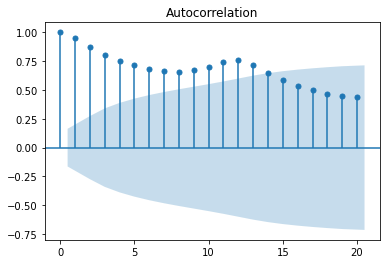

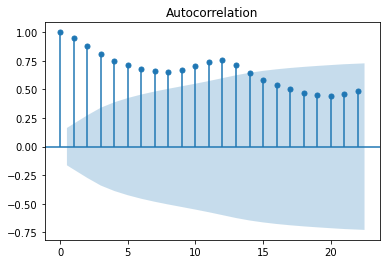

In [60]:
file_acf_coef = acf(file)
plot_acf(file, lags=20)

plot_acf(file)
# Show the data as a plot (via matplotlib)
plt.show()

Calculate partial autocorrelation

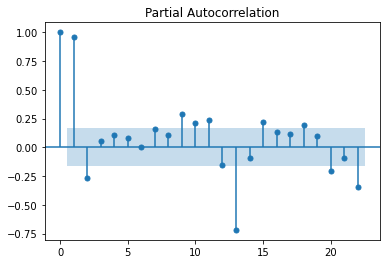

In [19]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(file)
plt.show()

In [20]:
# The plot confirms our assumption about the correlation on lag 12. The same is visible at lag 24, but the correlation declines over time. Value 12 periods ago has more impact on the value today than value 24 periods ago does.
# Another thing to note is the shaded area. Anything inside it isn’t statistically significant

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


In [22]:
file.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


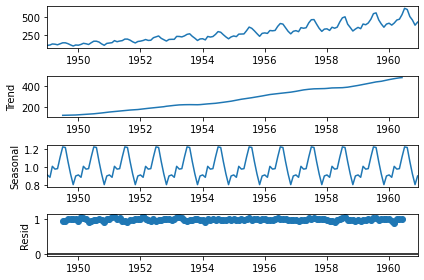

In [23]:
Decompose = seasonal_decompose(file, model='multiplicative')
Decompose.plot()
plt.show()


Can you describe the charts?


In the first graph, the original data so the time series of passengers. 

In the next one, number of passengers increases in time 

The third garph shows seasonality, so how data is repeated in time. 

We can see that the trend and seasonality information extracted from the series does seem reasonable. The residuals are also interesting, showing periods of high variability in the early and later years of the series

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [25]:
#to make data stationary I first try the diff method

file['Difference'] = file['Passengers'].diff()

In [27]:
#Now I check if the data is stationary 
result = adfuller(file.Difference.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -2.83
5% Critical Value: -2.88
p-value: 0.05


In [28]:
#p-value is equal to 0.05 which means that the data is not stationary

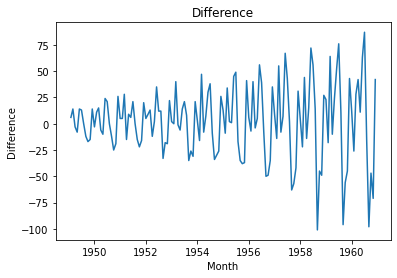

In [32]:
sns.lineplot(x=file.index, y=file.Difference)
plt.title('Difference')
plt.show()

In [34]:
# I will try to use another method to test stationarity
from statsmodels.tsa.stattools import kpss

result = kpss(file.Difference.dropna())
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(0.053009761898505314, 0.1, 14, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 0.05
5% Critical Value: 0.46
p-value: 0.10


In [ ]:
'''
For the second test the p-value is below 0.10 so the data is not stationary, so I need to try another method I will try to do log and then diff 
'''

In [35]:
import numpy as np
file['log'] = np.log(file.Passengers)
file['log'] = file['log'].diff()
data = file.drop(file.index[0])

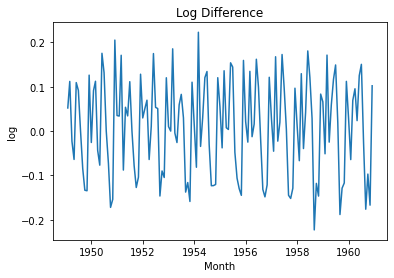

In [36]:
sns.lineplot(x=data.index, y=data.log)
plt.title('Log Difference')
plt.show()

In [37]:
data.head()

,Passengers,Difference,log
Month,,,
1949-02-01,118,6.0,0.052186
1949-03-01,132,14.0,0.112117
1949-04-01,129,-3.0,-0.022990
1949-05-01,121,-8.0,-0.064022
1949-06-01,135,14.0,0.109484


In [38]:
#Now I check fo stationarity using two methods
result = adfuller(data.log.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -2.72
5% Critical Value: -2.88
p-value: 0.07


In [39]:
result = kpss(data.log.dropna())
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(0.10154458687402602, 0.1, 14, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 0.10
5% Critical Value: 0.46
p-value: 0.10


In [40]:
'''
p-value is equal to 0.07 so it is greater than 0.05 and I cannot reject the H0 hypothesis which means that the data is not stationary.
'''

'\np-value is equal to 0.07 so it is greater than 0.05 and I cannot reject the H0 hypothesis which means that the data is not stationary.\n'

In [41]:
from scipy.stats import boxcox

data['boxcox'],parameters= boxcox(data['Passengers'])
data['boxcox']=data['boxcox'].diff()

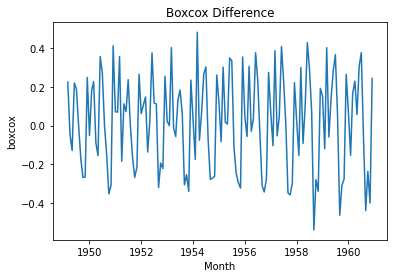

In [42]:
sns.lineplot(x=data.index, y=data.boxcox)
plt.title('Boxcox Difference')
plt.show()

In [43]:
result = adfuller(data.boxcox.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -3.39
5% Critical Value: -2.88
p-value: 0.01


In [44]:
'''
Now p-value is less than 0.05 which means that I can reject H0 hypothesis and the data is stationary
'''

'\nNow p-value is less than 0.05 which means that I can reject H0 hypothesis and the data is stationary\n'

MA(1)

In [45]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(data.boxcox.dropna(), order=(0, 1))
res = mod.fit()

Display the output

In [46]:
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                     ARMA(0, 1)   Log Likelihood                   5.890
Method:                       css-mle   S.D. of innovations              0.232
Date:                Mon, 07 Feb 2022   AIC                             -5.779
Time:                        12:01:54   BIC                              3.088
Sample:                    03-01-1949   HQIC                            -2.176
                         - 12-01-1960                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0212      0.025      0.843      0.399      -0.028       0.070
ma.L1.boxcox     0.2915      0.094      3.086      0.002       0.106       0.477
                                    Roots   

In [48]:
# I create predictions in order to calculate RMSE and compare it later with diffrent models
predictions_mod = res.predict(data.boxcox.index[-15],data.boxcox.index[-1])

In [49]:
from statsmodels.tools.eval_measures import rmse
rmse_1 = rmse(data.boxcox[-15:],predictions_mod)
rmse_1

0.2472733457229198

MA(2)

In [50]:
mod2 = ARMA(data.boxcox.dropna(), order=(0, 2))
res2 = mod2.fit()

Display the output

In [51]:
print(res2.summary())

                              ARMA Model Results                              
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                     ARMA(0, 2)   Log Likelihood                   8.086
Method:                       css-mle   S.D. of innovations              0.228
Date:                Mon, 07 Feb 2022   AIC                             -8.173
Time:                        12:02:37   BIC                              3.650
Sample:                    03-01-1949   HQIC                            -3.368
                         - 12-01-1960                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0208      0.017      1.205      0.228      -0.013       0.055
ma.L1.boxcox     0.2310      0.112      2.063      0.039       0.012       0.451
ma.L2.boxcox    -0.3318      0.181     -1.83

In [52]:
#Prediticons for model2
predictions_mod2 = res2.predict(data.boxcox.index[-15],data.boxcox.index[-1])

In [53]:
rmse_2 = rmse(data.boxcox[-15:],predictions_mod2)
rmse_2

0.2569152858515212

AR(2)

In [54]:
mod3 = ARMA(data.boxcox.dropna(), order=(2, 0))
res3 = mod3.fit()

In [55]:
print(res3.summary())

                              ARMA Model Results                              
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                     ARMA(2, 0)   Log Likelihood                   6.873
Method:                       css-mle   S.D. of innovations              0.230
Date:                Mon, 07 Feb 2022   AIC                             -5.745
Time:                        12:03:12   BIC                              6.078
Sample:                    03-01-1949   HQIC                            -0.941
                         - 12-01-1960                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0210      0.021      0.997      0.319      -0.020       0.062
ar.L1.boxcox     0.2563      0.083      3.080      0.002       0.093       0.419
ar.L2.boxcox    -0.1760      0.084     -2.10

In [56]:
#Prediticons for model3
predictions_mod3 = res3.predict(data.boxcox.index[-15],data.boxcox.index[-1])

In [57]:
rmse_3 = rmse(data.boxcox[-15:],predictions_mod3)
rmse_3

0.24784866994354415

ARMA (?,?)

In [58]:
mod4 = ARMA(data.boxcox.dropna(), order=(2, 2))
res4 = mod4.fit()

Display the output

In [59]:
print(res4.summary())

                              ARMA Model Results                              
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                     ARMA(2, 2)   Log Likelihood                  30.026
Method:                       css-mle   S.D. of innovations              0.192
Date:                Mon, 07 Feb 2022   AIC                            -48.052
Time:                        12:03:53   BIC                            -30.318
Sample:                    03-01-1949   HQIC                           -40.846
                         - 12-01-1960                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0224      0.001     42.564      0.000       0.021       0.023
ar.L1.boxcox     1.4661      0.075     19.576      0.000       1.319       1.613
ar.L2.boxcox    -0.7464      0.059    -12.60

In [60]:
#Prediticons for model4
predictions_mod4 = res4.predict(data.boxcox.index[-15],data.boxcox.index[-1])

In [61]:
rmse_4 = rmse(data.boxcox[-15:],predictions_mod4)
rmse_4

0.1955656551525817

ARIMA(?,?)

In [62]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
mod5 = ARIMA(data.boxcox.dropna(), order=(2,1,2))
res5 = mod5.fit()

Display the output

In [63]:
print(res5.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.boxcox   No. Observations:                  141
Model:                 ARIMA(2, 1, 2)   Log Likelihood                   6.308
Method:                       css-mle   S.D. of innovations              0.227
Date:                Mon, 07 Feb 2022   AIC                             -0.615
Time:                        12:04:18   BIC                             17.077
Sample:                    04-01-1949   HQIC                             6.574
                         - 12-01-1960                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0001      0.001     -0.195      0.846      -0.001       0.001
ar.L1.D.boxcox    -0.5737      0.115     -4.988      0.000      -0.799      -0.348
ar.L2.D.boxcox     0.0502      0.096

In [64]:
#Prediticons for model5
predictions_mod5 = res5.predict(data.boxcox.index[-15],data.boxcox.index[-1])

In [65]:
rmse_5 = rmse(data.boxcox[-15:],predictions_mod4)
rmse_5

0.1955656551525817

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [66]:
# Since I calculated earlier RMSE for all of the models I will just put it into one dataframe with AIC in order to compare models

Calculate AIC

In [67]:
res5.aic

-0.615371807489737

In [69]:
res.aic

-5.779298355779417

In [70]:
comparison_models = pd.DataFrame({'model': ['MA(1)','MA(2)', 'AR(2)', 'ARMA(2,2)','ARIMA(2,1,2)'],
                                  'RMSE': [rmse_1, rmse_2,rmse_3,rmse_4,rmse_5], 
                                  'AIC': [res.aic, res2.aic,res3.aic,res4.aic,res5.aic]})

In [71]:
comparison_models.set_index('model')

,RMSE,AIC
model,,
MA(1),0.247273,-5.779298
MA(2),0.256915,-8.172982
AR(2),0.247849,-5.745083
"ARMA(2,2)",0.195566,-48.052500
"ARIMA(2,1,2)",0.195566,-0.615372


In [ ]:
'''
For both parameters i.e. RMSE and AIC the lower the value the better. Taking that into accout the best model seems to be ARMA(2,2). The rest of the models give diffrent order of values in terms of these two parameters so it is difficult to say what is the exact oredr of models baisng on the two parameters. Taking into account only RMSE the ARIMA and ARMA model are the best, followed by AR and both MA models. 
On the other hand taking into account only AIC parameter ARMA(2,2) model is the best folowed by MA(2) both MA(1) and AR(2) and the worst one ARIMA(2,1,2).
'''